<a href="https://colab.research.google.com/github/enakirimoto/projeto-puc-analise-de-dados-e-boas-praticas/blob/main/Template_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Aluno Template

**Matrícula:** 2025000

**Dataset:** [Iris Dataset](https://archive.ics.uci.edu/dataset/53/iris)

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

# Descrição do Problema

O conjunto de dados Iris é um conjunto de dados multivariado que consiste em medidas de flores de três espécies diferentes de Íris: Iris setosa, Iris versicolor e Iris virginica. O objetivo principal é classificar a espécie de Íris com base em quatro características de suas flores: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre comprimento da pétala e largura da pétala?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (comprimento e largura da sépala, comprimento e largura da pétala), o objetivo é prever a qual das três classes (espécies de Íris) uma determinada flor pertence.

## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***sepal length*** (comprimento da sépala em cm)
- ***sepal width*** (largura da sépala em cm)
- ***petal length*** (comprimento da pétala em cm)
- ***petal width*** (largura da pétala em cm)
- ***species*** (espécie de Íris: setosa, versicolor, virginica)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# carregamento do dataset (aqui, ele fica disponível nesse método)
iris = load_iris()

In [3]:
# guardo o dataset em um dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [4]:
# primeiras linhas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Iris, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

In [5]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 150

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


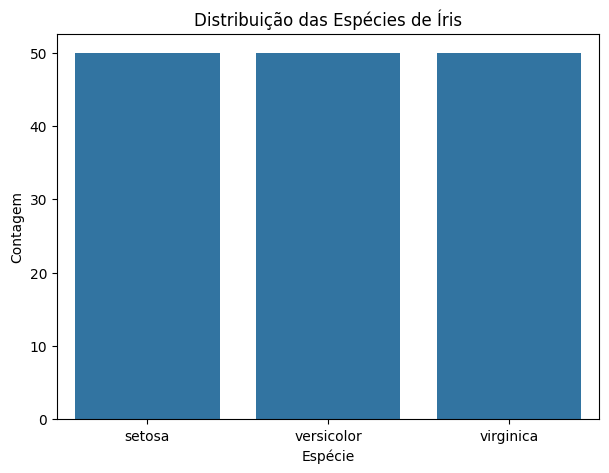

In [6]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='species', data=df)
plt.title('Distribuição das Espécies de Íris')
plt.xlabel('Espécie')
plt.ylabel('Contagem')
plt.show()

O gráfico de barras mostra que cada espécie de Íris (setosa, versicolor, virginica) possui 50 amostras, confirmando que o dataset é balanceado em termos de classes.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [7]:
# estatísticas descritivas básicas do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [8]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
sepal length (cm),5.843333
sepal width (cm),3.057333
petal length (cm),3.758000
petal width (cm),1.199333


In [9]:
# Qual gráfico seria interessante usar pra mostrar a média?

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [10]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
sepal length (cm),0.828066
sepal width (cm),0.435866
petal length (cm),1.765298
petal width (cm),0.762238


In [11]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

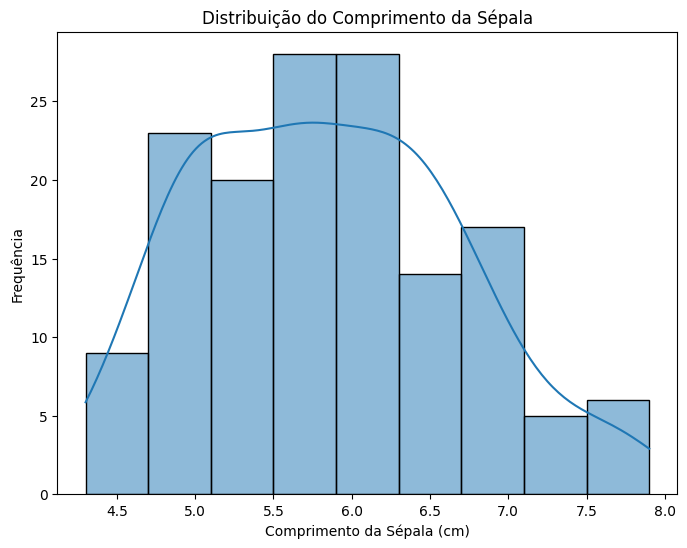

In [12]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

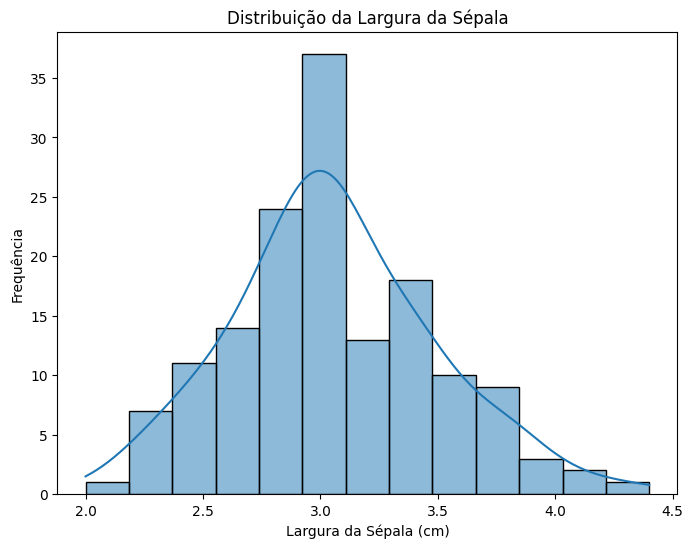

In [13]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Distribuição da Largura da Sépala')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [14]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('species').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

### *petal length* por Espécie


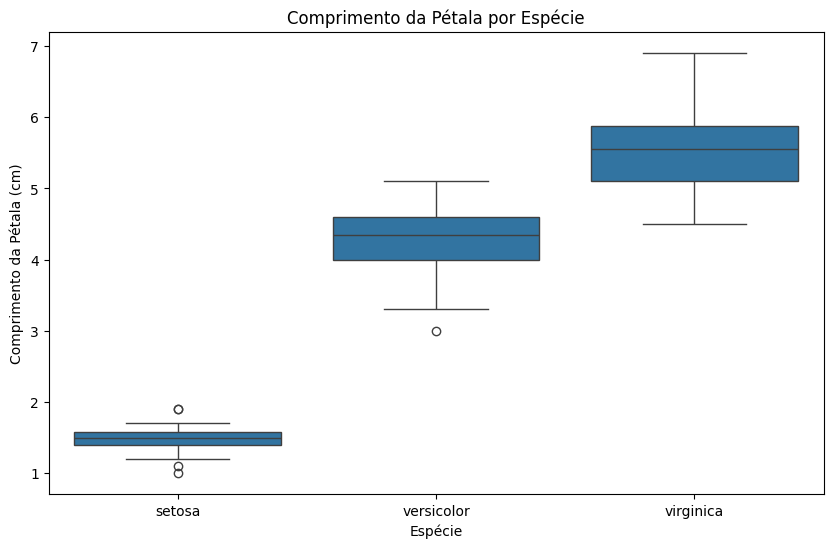

In [15]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

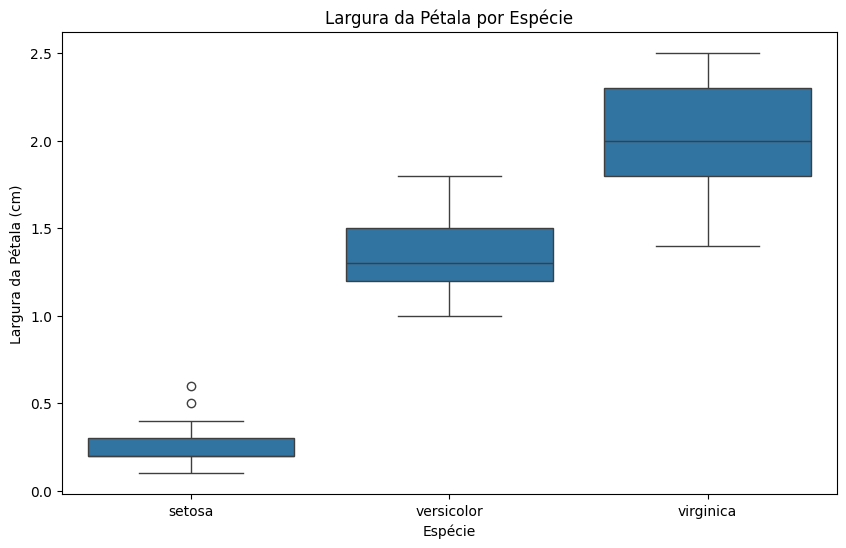

In [16]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [17]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()


Matriz de Correlação:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


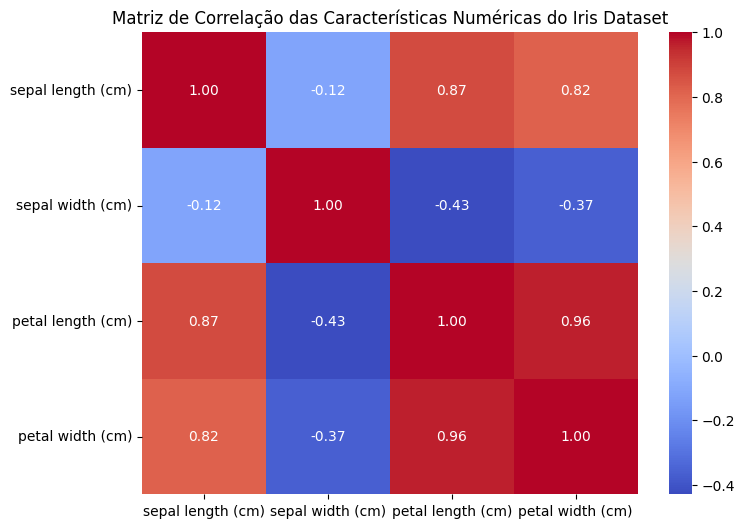

In [18]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [19]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

In [20]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [22]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [23]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [24]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [25]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


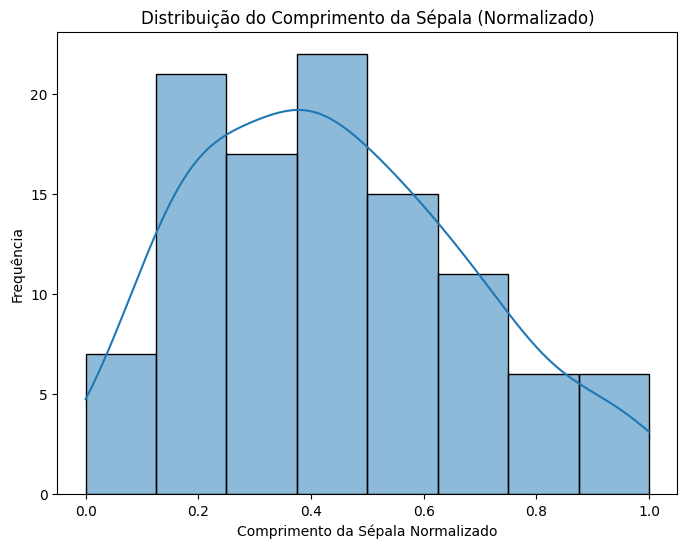

In [26]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [27]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [28]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [29]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [30]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


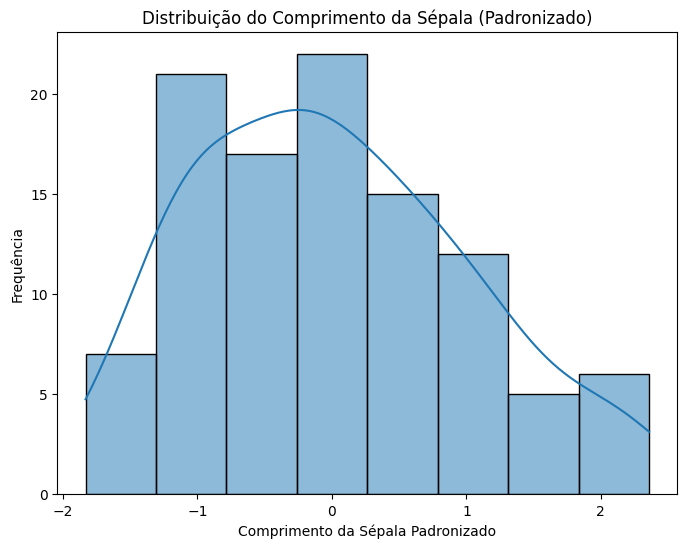

In [31]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [32]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.

# Descrição do Problema

O conjunto de dados de performance é um conjunto de dados de algumas máquinas semelhantes. Nesses dados há uma lista de máquinas definidas por : Maquina Alpha, Maquina Beta, Maquina Gamma, Maquina Delta, Maquina Epsilon, Maquina Zeta, Maquina Eta, Maquina Theta, Maquina Iota, Maquina Kappa, Maquina Lambda, Maquina Sigma, Maquina Omega. O objetivo principal é classificar os equipamentos com base nas variáveis dia da semana, OEE, IE, IQ e eventos de parada.

## Hipóteses do Problema

As hipóteses que traçadas foram as seguintes:

- Há alguma correlação entre o OEE e o dia da semana?

- Existe alguma correlação entre o OEE e os eventos de parada?

- Há alguma máquina que precisa melhorar a qualidade?


## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de variáveis (dia da semana, turno, máquina e histórico), o objetivo é prever o OEE do equipamento no dia seguinte.

## Seleção de Dados

O dataset de máquinas é um dataset de um grupo de equipamentos que foi coletado com o uso de um sistema de execução de manufatura. Nesse dataset, alguns eventos foram agrupados e os nomes da máquinas foram alterados com o objetivo de anonimizar os dados. Esse dataset está na com vários problemas que foram mantidos com o objetivo de exercitar os conhecimentos adquiridos nas disciplinas.

## Atributos do Dataset

O dataset contém registros de produção industrial com diversos indicadores de desempenho e eventos. Possui os seguintes atributos:

- **Data**: data do registro  
- **Turno**: turno de operação  
- **PEvento**: evento de parada com maior duração  
- **FreqPEvento**: frequência de ocorrência do evento de parada com maior duração
- **DuracaoPEvento**: duração total do evento de parada de maior duração
- **SEvento**: evento de parada com a segunda maior duração
- **FreqSEvento**: frequência de ocorrência do evento com a segunda maior duração
- **DuracaoSEvento**: duração total do evento com a segunda maior duração
- **Somatoral**: tempo total acumulado em todos os eventos
- **Dds**: dia da semana em código
- **Maquina**: identificador da máquina  
- **Meta**: meta de OEE
- **Dds2**: dia da semana descrito  
- **ID**: índice de disponibilidade do equipamento  
- **IE**: índice de eficiência  
- **IQ**: índice de qualidade  
- **OEE**: overall equipment effectiveness — eficiência geral dos equipamentos, que é o resultado da multiplicação de IDxIQxIE


- Início das bibliotecas

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.dates as mdates

- Ínício do carregamento dos dados da base de dados.

In [34]:
# Link com o arquivo que inseri no github
url = "https://raw.githubusercontent.com/enakirimoto/projeto-puc-analise-de-dados-e-boas-praticas/refs/heads/main/Database_final.csv"

# Convertendo o arquivo em um dataframe
df = pd.read_csv(url)

# Exibindo as primeiras linhas do DataFrame
print(df.head())

         Data  Turno           PEvento  FreqPEvento  DuracaoPEvento  \
0  2025-01-10      1  Parada planejada            1         33480.0   
1  2025-01-10      2  Parada planejada            1         32760.0   
2  2025-01-10      3  Parada planejada            1         31560.0   
3  2025-01-10      1  Parada planejada            4         18521.0   
4  2025-01-10      2          OPERANDO           35         13148.0   

      SEvento  FreqSEvento  DuracaoSEvento  Somatoral  Dds        Maquina  \
0         NaN          NaN             NaN    33480.0  6.0  Maquina Alpha   
1         NaN          NaN             NaN    32760.0  6.0  Maquina Alpha   
2         NaN          NaN             NaN    31560.0  6.0  Maquina Alpha   
3    OPERANDO         19.0          8478.0    30600.0  6.0   Maquina Beta   
4  PREPARAÇÃO          2.0          2912.0    30600.0  6.0   Maquina Beta   

   Meta         Dds2     ID      IE     IQ    OEE  
0  65.0  sexta-feira    NaN     NaN    NaN    NaN  
1  65.

- Iniciando a análise exploratória dos dados avaliando algumas informações do dataframe


In [35]:
print(df.values)

[['2025-01-10' 1 'Parada planejada' ... nan nan nan]
 ['2025-01-10' 2 'Parada planejada' ... nan nan nan]
 ['2025-01-10' 3 'Parada planejada' ... nan nan nan]
 ...
 ['2025-06-08' 2 'FIM DE SEMANA' ... nan nan nan]
 ['2025-06-08' 1 'FIM DE SEMANA' ... nan nan nan]
 ['2025-06-08' 2 'FIM DE SEMANA' ... nan nan nan]]


- Aparentemente há vários dados com formatações despadronizadas e valores com "NaN". São poucas informações para tomar uma decisão de substituir as variáveis "NaN" por algum valor.

In [36]:
print(df.columns)
print(df.dtypes)

Index(['Data', 'Turno', 'PEvento', 'FreqPEvento', 'DuracaoPEvento', 'SEvento',
       'FreqSEvento', 'DuracaoSEvento', 'Somatoral', 'Dds', 'Maquina', 'Meta',
       'Dds2', 'ID', 'IE', 'IQ', 'OEE'],
      dtype='object')
Data               object
Turno               int64
PEvento            object
FreqPEvento         int64
DuracaoPEvento    float64
SEvento            object
FreqSEvento       float64
DuracaoSEvento    float64
Somatoral         float64
Dds               float64
Maquina            object
Meta              float64
Dds2               object
ID                float64
IE                float64
IQ                float64
OEE               float64
dtype: object


- Para entender o efeito do final de semana vou plotar os dados em um gráfico de linhas. A data não está no formato adequado, logo vou precisar ajustar os dados primeiro


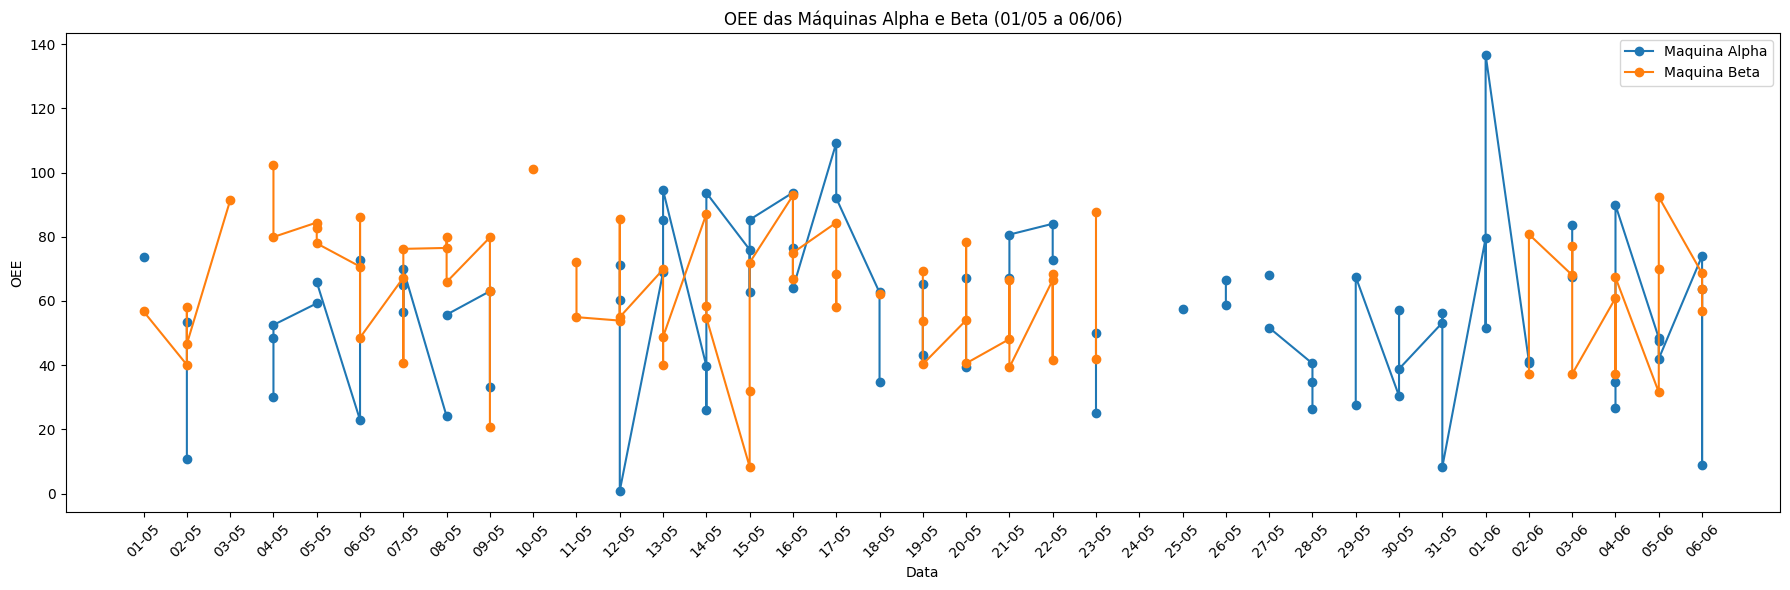

In [37]:
# Filtrar Alpha e Beta
df_filtered = df[df['Maquina'].isin(['Maquina Alpha', 'Maquina Beta'])].copy()

# Converter a coluna Data para datetime
df_filtered['Data'] = pd.to_datetime(df_filtered['Data'])

# Filtrar intervalo de datas entre 01/05 e 06/06
start_date = pd.to_datetime('2025-05-01')
end_date = pd.to_datetime('2025-06-06')
df_filtered = df_filtered[(df_filtered['Data'] >= start_date) & (df_filtered['Data'] <= end_date)]

# Ordenar e resetar índice
df_filtered = df_filtered.sort_values('Data').reset_index(drop=True)

# Criar gráfico
fig, ax = plt.subplots(figsize=(18, 6))

# Plotar OEE para cada máquina
for machine in ['Maquina Alpha', 'Maquina Beta']:
    df_machine = df_filtered[df_filtered['Maquina'] == machine]
    ax.plot(df_machine['Data'], df_machine['OEE'], marker='o', linestyle='-', label=machine)

#Legendas
ax.set_xlabel('Data')
ax.set_ylabel('OEE')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Ajustar número de rótulos no eixo X
step = 1
ax.set_xticks(df_filtered['Data'].drop_duplicates()[::step])
plt.xticks(rotation=45)

# Adicionar legenda e título
ax.legend()
plt.title('OEE das Máquinas Alpha e Beta (01/05 a 06/06)')
plt.tight_layout()
plt.show()

- Aparentemente não são todas as máquinas que possuem apontamentos nos sábados e domingos. Ainda não dá para afirmar que todos os dados podem ser apagados mas deve-se avaliar os eventos do dia para entender o que está ocorrendo.

In [38]:
# Filtrar intervalo de datas entre 01/05 e 06/06
df_filtered2 = df_filtered
start_date2 = pd.to_datetime('2025-05-22')
end_date2 = pd.to_datetime('2025-05-27')
df_filtered2 = df_filtered2[(df_filtered2['Data'] >= start_date2) & (df_filtered2['Data'] <= end_date2)]

filtered = ['Data','PEvento','SEvento', 'OEE', 'Dds2','Dds']
df_colunas_selecionadas = df_filtered2[filtered]
print(df_colunas_selecionadas)

          Data                        PEvento  \
123 2025-05-22                       OPERANDO   
124 2025-05-22                       OPERANDO   
125 2025-05-22                       OPERANDO   
126 2025-05-22            TURNO NÃO PLANEJADO   
127 2025-05-22                       OPERANDO   
128 2025-05-22                       OPERANDO   
129 2025-05-23            TURNO NÃO PLANEJADO   
130 2025-05-23               Parada planejada   
131 2025-05-23               Parada planejada   
132 2025-05-23                       OPERANDO   
133 2025-05-23               Parada planejada   
134 2025-05-23            TURNO NÃO PLANEJADO   
135 2025-05-24                  FIM DE SEMANA   
136 2025-05-24                  FIM DE SEMANA   
137 2025-05-24                  FIM DE SEMANA   
138 2025-05-24                  FIM DE SEMANA   
139 2025-05-24                  FIM DE SEMANA   
140 2025-05-25                  FIM DE SEMANA   
141 2025-05-25                  FIM DE SEMANA   
142 2025-05-25      

- Ao avaliar os eventos, identificaram-se que alguns eventos explicam o valor de OEE estar "NaN". O evento "FIM DE SEMANA", "TURNO NÃO PLANEJADO" e "MANUTENÇÃO PREVENTIVA", quando inseridos como eventos de maior duração e sem o segundo evento registrado, fica claros serem dias sem operação. Por conseguinte, pensando-se em um dataset que será utilizado para o treinamento de um modelo, entende-se que podemos retirar os finais de semana. Já as manutenções preventivas não são fixas no ano, e retirar a data da base de dados pode prejudicar o modelo, logo os finais de semana serão eliminados e os eventos definidos serão substituidos pelo valor da mediana da população.

            Data  Turno              PEvento  FreqPEvento  DuracaoPEvento  \
0     2025-01-10      1     Parada planejada            1         33480.0   
1     2025-01-10      2     Parada planejada            1         32760.0   
2     2025-01-10      3     Parada planejada            1         31560.0   
3     2025-01-10      1     Parada planejada            4         18521.0   
4     2025-01-10      2             OPERANDO           35         13148.0   
...          ...    ...                  ...          ...             ...   
5704  2025-06-06      2             OPERANDO           10         28171.0   
5705  2025-06-06      3  TURNO NÃO PLANEJADO            1         31560.0   
5706  2025-06-06      1             OPERANDO           17         24497.0   
5707  2025-06-06      2             OPERANDO           23         13542.0   
5708  2025-06-06      3  TURNO NÃO PLANEJADO            1         31560.0   

                            SEvento  FreqSEvento  DuracaoSEvento  Somatoral

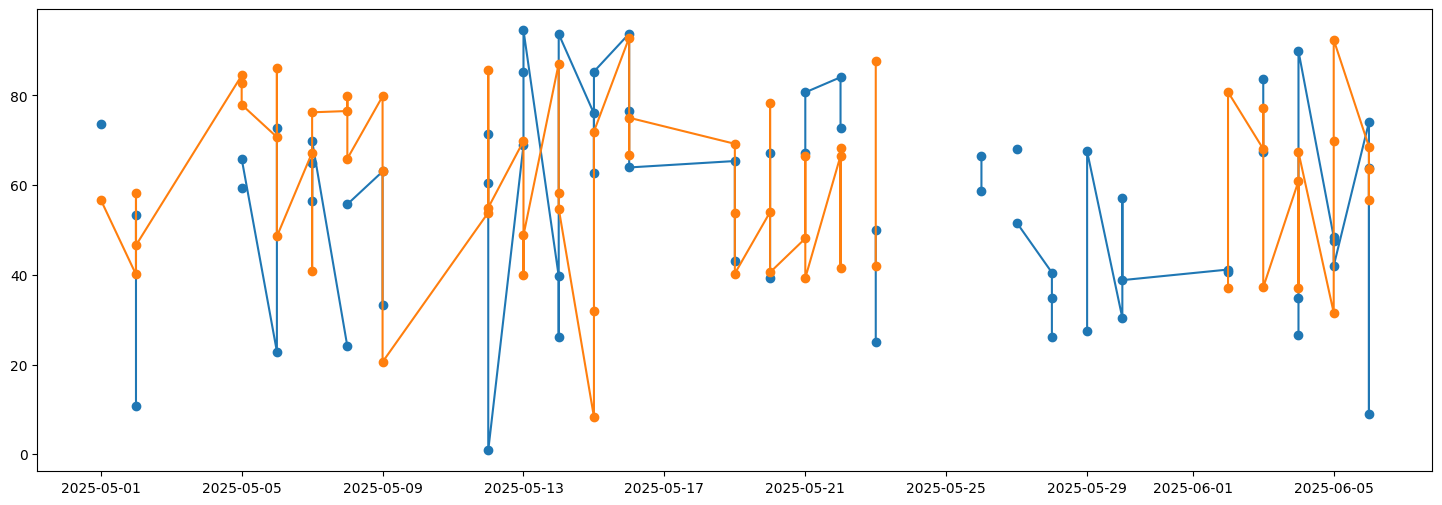

In [39]:
df = df[~df["Dds"].isin([1, 7])]
print(df)

# Filtrar parte dos dados para conseguir avaliar o gráfico
df_filtered = df_filtered[~df_filtered["Dds"].isin([1,7])]

# Criar gráfico
fig, ax = plt.subplots(figsize=(18, 6))

# Plotar OEE para cada máquina
for machine in ['Maquina Alpha', 'Maquina Beta']:
    df_machine = df_filtered[df_filtered['Maquina'] == machine]
    ax.plot(df_machine['Data'], df_machine['OEE'], marker='o', linestyle='-', label=machine)

plt.show()

- Ainda há dados "NaN", mas parte das anomalias foram eliminadas.

          Data  Turno              PEvento  FreqPEvento  DuracaoPEvento  \
0   2025-05-01      1     Parada planejada            1         31825.0   
1   2025-05-01      2             OPERANDO           18         17370.0   
2   2025-05-01      3  TURNO NÃO PLANEJADO            1         20160.0   
3   2025-05-01      1     Parada planejada            1         30600.0   
4   2025-05-01      2     Parada planejada            1         30600.0   
..         ...    ...                  ...          ...             ...   
213 2025-06-06      3  TURNO NÃO PLANEJADO            5         14294.0   
214 2025-06-06      2             OPERANDO           18         13179.0   
215 2025-06-06      1  ProblemasManutencao            2         24387.0   
216 2025-06-06      2             OPERANDO           20         20661.0   
217 2025-06-06      3  TURNO NÃO PLANEJADO            3         14472.0   

               SEvento  FreqSEvento  DuracaoSEvento  Somatoral  Dds  \
0             OPERANDO      

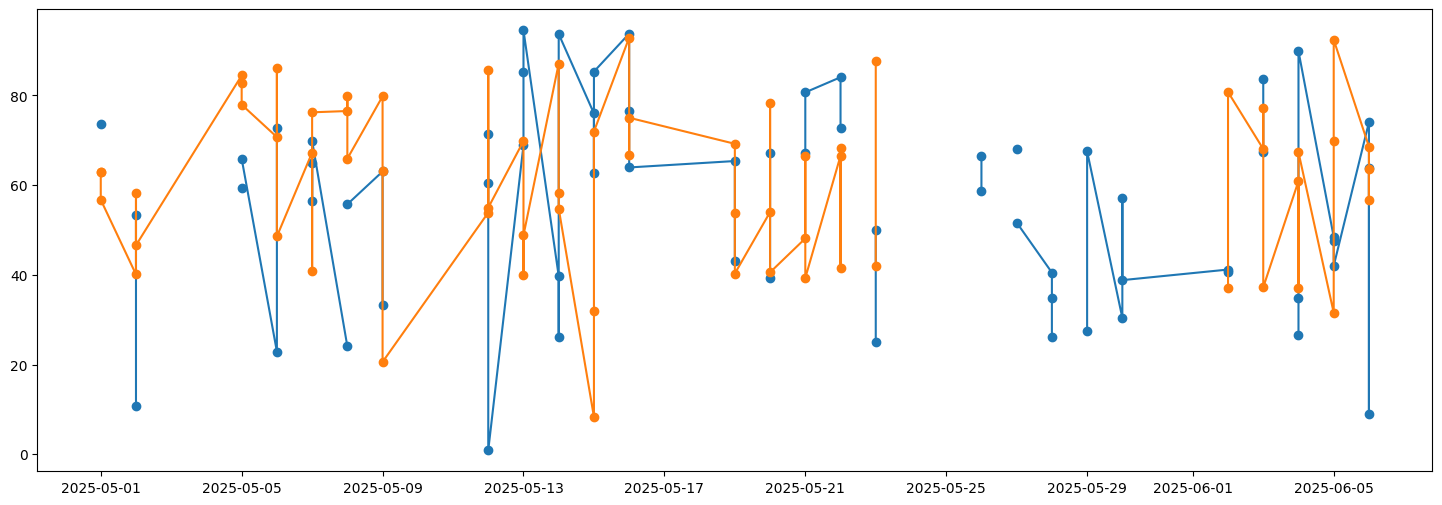

In [45]:
# Calcula a mediana dos campos desejados
mediana_oee = df["OEE"].median()
mediana_id = df["ID"].median()
mediana_ie = df["IE"].median()
mediana_iq = df["IQ"].median()

# Aplica a condição: PEvento == "Parada planejada" e SEvento == NaN
condicao = (df["PEvento"] == "Parada planejada") &  (df["SEvento"].isna())
df.loc[condicao, "OEE"] = mediana_oee
df.loc[condicao, "ID"] = mediana_id
df.loc[condicao, "IE"] = mediana_ie
df.loc[condicao, "IQ"] = mediana_iq


# Calcula a mediana dos campos desejados
mediana_oee2 = df_filtered["OEE"].median()
mediana_id2 = df_filtered["ID"].median()
mediana_ie2 = df_filtered["IE"].median()
mediana_iq2 = df_filtered["IQ"].median()

# Aplica a condição: PEvento == "Parada planejada" e SEvento == NaN
condicao = (df_filtered["PEvento"] == "Parada planejada") & (df_filtered["SEvento"].isna())
df_filtered.loc[condicao, "OEE"] = mediana_oee2
df_filtered.loc[condicao, "ID"] = mediana_id2
df_filtered.loc[condicao, "IE"] = mediana_ie2
df_filtered.loc[condicao, "IQ"] = mediana_iq2

print(df_filtered)

# Criar gráfico
fig, ax = plt.subplots(figsize=(18, 6))
for machine in ['Maquina Alpha', 'Maquina Beta']:
    df_machine = df_filtered[df_filtered['Maquina'] == machine]
    ax.plot(df_machine['Data'], df_machine['OEE'], marker='o', linestyle='-', label=machine)

plt.show()


- Para não se estender na explicação, serão feitas duas simplificações nos dados. Primeiro vou eliminar o início da base de dados pois houveram diversas falhas por conta de férias coletivas. Segundo, vou substituir os outros valores que estão "NaN" pela "0" para calcular os dados estatísticos. E os valores "inf" pela mediana


In [51]:
df_stat = df.copy()
df_stat["OEE"] = df_stat["OEE"].replace([np.inf, -np.inf], mediana_oee)
df_stat["ID"] = df_stat["ID"].replace([np.inf, -np.inf], mediana_id)
df_stat["IE"] = df_stat["IE"].replace([np.inf, -np.inf], mediana_ie)
df_stat[["OEE", "ID", "IE", "IQ"]] = df_stat[["OEE", "ID", "IE", "IQ"]].fillna(0)


df_stat.describe()


,Turno,FreqPEvento,DuracaoPEvento,FreqSEvento,DuracaoSEvento,Somatoral,Dds,Meta,ID,IE,IQ,OEE
count,4098.000000,4098.000000,4098.000000,3582.00000,3582.000000,4098.000000,4096.000000,4096.000000,4098.000000,4098.000000,4098.000000,4098.000000
mean,2.000244,12.232552,19366.196437,4.11474,3561.855109,29436.612494,4.020752,64.807617,56.696279,100.694470,100.317616,59.233553
std,0.816746,9.675620,7225.147213,4.77707,2752.817046,5387.967252,1.421382,3.671771,17.163044,15.387664,4.330774,18.425341
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,55.000000,0.000000,6.900000,100.000000,0.130000
25%,1.000000,1.000000,13856.000000,1.00000,1878.000000,25200.000000,3.000000,65.000000,50.337500,97.670000,100.000000,51.130000
50%,2.000000,13.000000,19020.000000,2.00000,2907.000000,32760.000000,4.000000,65.000000,58.750000,102.880000,100.000000,60.340000
75%,3.000000,20.000000,22833.500000,6.00000,4911.750000,33480.000000,5.000000,68.000000,66.170000,107.127500,100.000000,68.820000
max,3.000000,52.000000,33480.000000,42.00000,16202.000000,33480.000000,6.000000,69.000000,100.000000,250.520000,266.140000,172.500000


Claramente temos alguns problemas aqui. Primeiro, há valores de "IQ" que são acima 100% e isso tecnicamente é impossível. Há valores exagerados de "OEE" e "IE". Estes não deveriam passar de 110%. Como o objetivo desse dataframe é analisar as correlações e dados estatísticos, vou eliminar todas as linhas que possuam dados fora dessa faixa pois vou assumir que esses dados são falhas humanas e podem contaminar as análises.

In [52]:
df_stat = df_stat[~((df_stat["IQ"] > 102) | (df_stat["OEE"] > 110) | (df_stat["IE"] > 110))]
df_stat.describe()

,Turno,FreqPEvento,DuracaoPEvento,FreqSEvento,DuracaoSEvento,Somatoral,Dds,Meta,ID,IE,IQ,OEE
count,3316.000000,3316.000000,3316.000000,2800.000000,2800.000000,3316.000000,3314.000000,3314.000000,3316.000000,3316.000000,3316.000000,3316.000000
mean,2.028347,11.447226,19837.208384,3.812500,3401.503214,29303.210796,4.024442,64.709113,55.438417,97.358869,100.017672,56.223565
std,0.823365,9.928823,7581.812939,4.591905,2801.057250,5521.824688,1.433612,3.778008,17.016121,13.431030,0.143944,16.464055
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,55.000000,0.000000,6.900000,100.000000,0.130000
25%,1.000000,1.000000,14034.000000,1.000000,1786.250000,25200.000000,3.000000,63.000000,49.785000,95.617500,100.000000,48.447500
50%,2.000000,12.000000,19664.500000,2.000000,2828.000000,32760.000000,4.000000,65.000000,58.750000,102.880000,100.000000,60.340000
75%,3.000000,19.000000,23733.500000,5.000000,4856.500000,33480.000000,5.000000,68.000000,62.982500,102.880000,100.000000,62.287500
max,3.000000,52.000000,33480.000000,31.000000,16202.000000,33480.000000,6.000000,69.000000,100.000000,110.000000,101.870000,109.560000


Para fazer as correlações, não dá para considerar apenas o valor do "OEE", pois há equipamentos que possuem capacidades distintas de "OEE". Vou criar um novo dataframe mais simples para analisarmos as correlações entre as máquinas, eventos e a diferença entre o OEE e a meta.

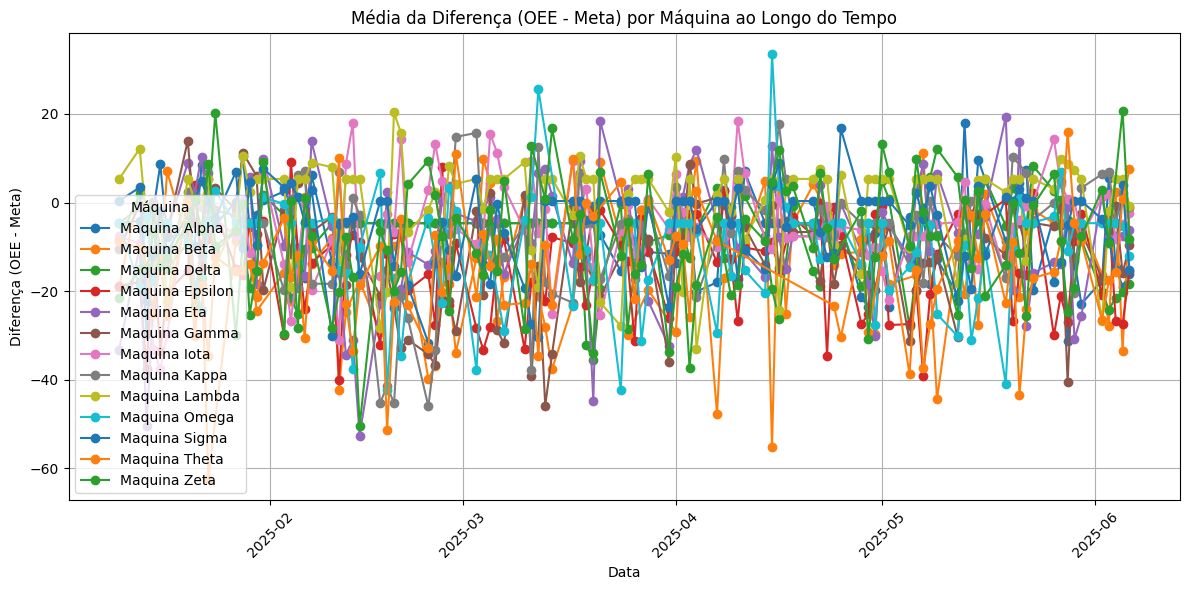

/tmp/ipython-input-62-2505320314.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Maquina", y="Diferença", data=df_novo, palette="Set3")


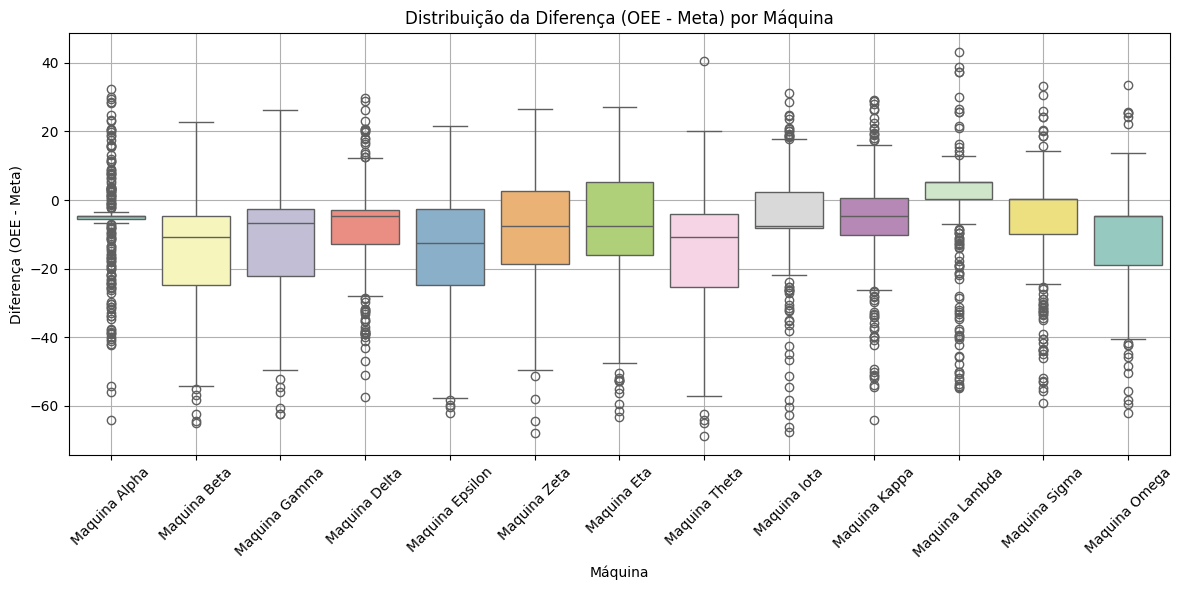

                 count       mean        std        min        25%        50%  \
Maquina                                                                         
Maquina Alpha    106.0  -6.402626   8.462476 -31.170000 -11.023333  -4.660000   
Maquina Beta      94.0 -14.572128  14.495633 -62.410000 -22.002500 -13.520833   
Maquina Delta    103.0  -7.840469   9.671887 -35.560000 -12.686667  -4.660000   
Maquina Epsilon  105.0 -14.320302  11.110584 -39.976667 -23.090000 -13.080000   
Maquina Eta      106.0  -8.096006  13.501683 -52.615000 -14.029167  -7.331667   
Maquina Gamma    104.0 -11.303510  11.946730 -45.846667 -17.700000  -8.883333   
Maquina Iota     105.0  -5.598857  10.465760 -37.700000 -10.135000  -5.926667   
Maquina Kappa    105.0  -6.630524  12.475536 -46.035000 -12.240000  -4.660000   
Maquina Lambda   106.0  -0.323758  10.562045 -33.080000  -3.958750   5.340000   
Maquina Omega    103.0 -10.401197  12.297665 -42.390000 -16.870000  -4.660000   
Maquina Sigma    106.0  -5.0

In [62]:
#Aqui crio um novo dataframe
df_novo = df_stat[["Maquina", "Turno", "Dds2", "Data", "PEvento"]].copy()
df_novo["Diferença"] = df["OEE"] - df["Meta"]

#Aqui agrupo os dados por máquina e faço a média dos turnos e em seguida ploto para avaliar os dados
df_novo["Data"] = pd.to_datetime(df_novo["Data"])
df_agrupado = df_novo.groupby(["Maquina", "Data"])["Diferença"].mean().reset_index()
df_agrupado = df_agrupado.sort_values(by=["Maquina", "Data"])

#Traramento dos dados para o gráfico
df_agrupado["Data"] = pd.to_datetime(df_agrupado["Data"])
plt.figure(figsize=(12, 6))
for maquina in df_agrupado["Maquina"].unique():
    dados_maquina = df_agrupado[df_agrupado["Maquina"] == maquina]
    plt.plot(dados_maquina["Data"], dados_maquina["Diferença"], marker='o', label=maquina)
plt.title("Média da Diferença (OEE - Meta) por Máquina ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Diferença (OEE - Meta)")
plt.legend(title="Máquina")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Maquina", y="Diferença", data=df_novo, palette="Set3")

plt.title("Distribuição da Diferença (OEE - Meta) por Máquina")
plt.xlabel("Máquina")
plt.ylabel("Diferença (OEE - Meta)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

estatisticas_por_maquina = df_agrupado.groupby("Maquina")["Diferença"].describe()
print(estatisticas_por_maquina)



Olhando as series temporais não há um padrão visual que justifique uma tendência no grupo de máquina mas podemos registrar uma hipótese de que provavelmente um modelo só não seria adequado para todas as máquinas. Com o gráfico boxplot identificamos um número elevado de outliers, mas não serão retirados pois algumas simplificações de substituição de "NaN" foram feitas. Aparentemente, grande parte das máquinas estão com um percentual de OEE abaixo da meta. Os dados estatístiticos

Correlação de variáveis categóricas com a coluna 'Diferença':
PEvento_TURNO NÃO PLANEJADO                       0.153739
Maquina_Maquina Lambda                            0.143849
Maquina_Maquina Sigma                             0.060111
PEvento_Parada planejada                          0.056764
PEvento_MANUTENÇÃO PREVENTIVA                     0.047402
Maquina_Maquina Iota                              0.046611
Maquina_Maquina Alpha                             0.040502
Maquina_Maquina Kappa                             0.034761
Dds2_sexta-feira                                  0.028166
Maquina_Maquina Delta                             0.019512
Maquina_Maquina Eta                               0.015856
Dds2_quinta-feira                                 0.011702
Dds2_terca-feira                                  0.010666
PEvento_REFEIÇÃO                                  0.004020
PEvento_OPERANDO                                 -0.005207
PEvento_MANUTENÇÃO CORRETIVA AGENDADA            -0.0

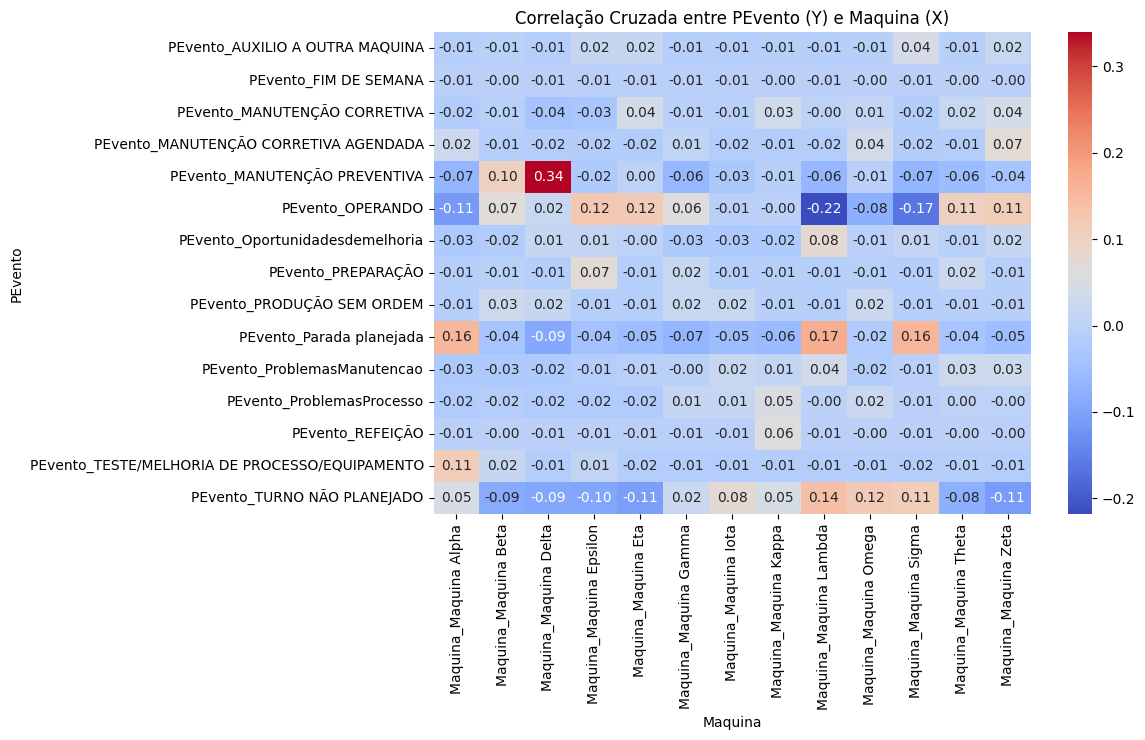

In [61]:
dummies_maquina = pd.get_dummies(df_novo["Maquina"], prefix="Maquina")
dummies_dds2 = pd.get_dummies(df_novo["Dds2"], prefix="Dds2")
dummies_pevento = pd.get_dummies(df_novo["PEvento"], prefix="PEvento")
df_dummies = pd.concat([dummies_maquina, dummies_dds2, dummies_pevento, df_novo["Diferença"]], axis=1)
correlacoes = df_dummies.corr(numeric_only=True)["Diferença"].drop("Diferença").sort_values(ascending=False)
print("Correlação de variáveis categóricas com a coluna 'Diferença':")
print(correlacoes)


# Cria dummies
matriz_correlacao = pd.DataFrame(index=dummies_pevento.columns, columns=dummies_maquina.columns)

for pev_col in dummies_pevento.columns:
    for maq_col in dummies_maquina.columns:
        correlacao = dummies_pevento[pev_col].corr(dummies_maquina[maq_col])
        matriz_correlacao.loc[pev_col, maq_col] = correlacao

# Converte para float para o heatmap funcionar
matriz_correlacao = matriz_correlacao.astype(float)

# Plot
plt.figure(figsize=(12, max(6, len(dummies_pevento.columns)*0.5)))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação Cruzada entre PEvento (Y) e Maquina (X)")
plt.xlabel("Maquina")
plt.ylabel("PEvento")
plt.tight_layout()
plt.show()


- Com a estatística avaliada entendemos que ... Mas para o modelo de predição, será utilizada apenas a relação entre data e OEE. \

In [48]:
#Substitui os valores da mediana no dataframe que será utilizado no treinamento do modelo
df["OEE"] = df["OEE"].fillna(mediana_oee)
df["ID"] = df["ID"].fillna(mediana_id)
df["IE"] = df["IE"].fillna(mediana_ie)
df["IQ"] = df["IQ"].fillna(mediana_iq)


            Data  Turno              PEvento  FreqPEvento  DuracaoPEvento  \
0     2025-01-10      1     Parada planejada            1         33480.0   
1     2025-01-10      2     Parada planejada            1         32760.0   
2     2025-01-10      3     Parada planejada            1         31560.0   
3     2025-01-10      1     Parada planejada            4         18521.0   
4     2025-01-10      2             OPERANDO           35         13148.0   
...          ...    ...                  ...          ...             ...   
5704  2025-06-06      2             OPERANDO           10         28171.0   
5705  2025-06-06      3  TURNO NÃO PLANEJADO            1         31560.0   
5706  2025-06-06      1             OPERANDO           17         24497.0   
5707  2025-06-06      2             OPERANDO           23         13542.0   
5708  2025-06-06      3  TURNO NÃO PLANEJADO            1         31560.0   

                            SEvento  FreqSEvento  DuracaoSEvento  Somatoral